### Table 1: SEL日志数据, 数据文件名: preliminary_sel_log_dataset.csv

### Table 2: 训练标签数据, 数据文件名: preliminary_train_label_dataset.csv, preliminary_train_label_dataset_s.csv

### Table 3: 选手提交数据, 数据文件名: preliminary_submit_dataset_a.csv, 对应的log文件名：preliminary_sel_log_dataset_a.csv

### Table 4: SEL日志语料数据, 数据文件名: additional_sel_log_dataset.csv

# 读取数据

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 更改工作目录为当前项目根目录
import sys
import os
os.chdir(os.path.dirname(os.path.dirname(sys.path[0])))
print(os.getcwd())

C:\workfile\python\Log-diagnosis


In [2]:
import pandas as pd
# 读取sel日志数据
sel_log = pd.read_csv('./pre_contest/dataset/preliminary_sel_log_dataset.csv')

# 读取训练标签数据：有重复数据！
train_label1=pd.read_csv('./pre_contest/dataset/preliminary_train_label_dataset.csv')
train_label2=pd.read_csv('./pre_contest/dataset/preliminary_train_label_dataset_s.csv')
train_label=train_label1.append(train_label2).drop_duplicates()

# 读取选手提交数据
submit_a=pd.read_csv('./pre_contest/dataset/preliminary_submit_dataset_a.csv')
submit_log=pd.read_csv('./pre_contest/dataset/preliminary_sel_log_dataset_a.csv')

# 读取sel日志语料数据：有重复数据！
additional_sel_log=pd.read_csv('./pre_contest/dataset/additional_sel_log_dataset.csv').drop_duplicates()

C:\Users\jinca\AppData\Local\Temp\ipykernel_17644\3385781229.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_label=train_label1.append(train_label2).drop_duplicates()


In [116]:
train_label.groupby('label').size()

label
0    1476
1    3387
2    9320
3    2421
dtype: int64

In [5]:
submit_log_list=[]
for log in submit_log['msg'].drop_duplicates():
    submit_log_list.append(log)

In [6]:
submit_log_list

[' System Boot Initiated BIOS_Boot_Up | Initiated by warm reset | Asserted',
 ' System Boot Initiated BIOS_Boot_Up | Initiated by power up | Asserted',
 ' Memory Memory_Status | Correctable ECC | Asserted',
 ' System ACPI Power State #0x7d | S0/G0: working | Asserted',
 ' System ACPI Power State #0x7d | S4/S5: soft-off | Asserted',
 ' Power Supply PSU1_Supply | Failure detected | Asserted',
 ' Memory #0xe2 | Correctable ECC | Asserted',
 ' System ACPI Power State ACPI_PWR_Status | S0/G0: working | Asserted',
 ' System ACPI Power State ACPI_PWR_Status | S4/S5: soft-off | Asserted',
 ' Unknown Chassis_control |  | Asserted',
 ' System Boot Initiated #0xe0 | Initiated by warm reset | Asserted',
 ' System Boot Initiated System Restart | System Restart | Asserted',
 ' OS Boot BIOS_Boot_Up | boot completed - device not specified | Asserted',
 ' Memory MEM_CHG1_Status | Correctable ECC | Asserted',
 ' OS Stop/Shutdown OS Status | OS graceful shutdown | Asserted',
 ' Memory MEM_CHG1_Status | U

# 数据量

In [21]:
# 数据量概览，列名和数据类型
print('sel_log')
print(sel_log.shape)
print(sel_log.dtypes)
# print('\n train_label1')
# print(train_label1.shape)
# print(train_label1.dtypes)
# print('\n train_label2')
# print(train_label2.shape)
# print(train_label2.dtypes)
print('\n train_label')
print(train_label.shape)
print(train_label.dtypes)
print('\n submit_a')
print(submit_a.shape)
print(submit_a.dtypes)
print('\n submit_log')
print(submit_log.shape)
print(submit_log.dtypes)
print('\n additional_sel_log')
print(additional_sel_log.shape)
print(additional_sel_log.dtypes)

sel_log
(482536, 4)
sn              object
time            object
msg             object
server_model    object
dtype: object

 train_label
(16604, 3)
sn            object
fault_time    object
label          int64
dtype: object

 submit_a
(3011, 2)
sn            object
fault_time    object
dtype: object

 submit_log
(10991, 4)
sn              object
time            object
msg             object
server_model    object
dtype: object

 additional_sel_log
(709224, 3)
sn      object
time    object
msg     object
dtype: object


# sel_log数据分析

Index(['sn', 'time', 'msg', 'server_model'], dtype='object')
482536
13705
5390
87
2019-12-27 23:38:05 2020-11-25 23:21:06
404400
482536
server_model
SM0       260
SM100    7190
SM102     713
SM103    3185
SM106    1200
         ... 
SM94       13
SM95     9641
SM96       47
SM98       15
SM99     6431
Length: 87, dtype: int64
server_model
SM0        1
SM100    176
SM102      8
SM103    121
SM106      3
        ... 
SM94       1
SM95      68
SM96       3
SM98       2
SM99     203
Name: sn, Length: 87, dtype: int64
server_model
SM0        2
SM100    696
SM102    127
SM103    118
SM106     16
        ... 
SM94       1
SM95     762
SM96       9
SM98       5
SM99     765
Name: msg, Length: 87, dtype: int64


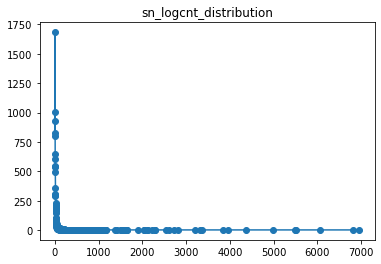

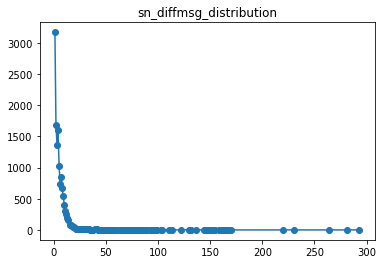

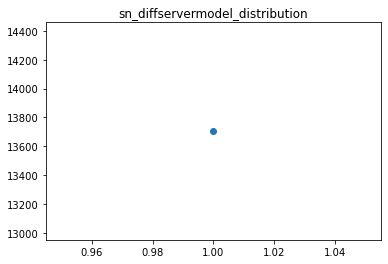

In [6]:
# sel_log数据分析
# 每列的数据量
print(sel_log.columns)
print(sel_log.shape[0])
print(sel_log['sn'].unique().shape[0])
print(sel_log['msg'].unique().shape[0])
print(sel_log['server_model'].unique().shape[0])
print(sel_log['time'].min(),sel_log['time'].max())
print(len(sel_log.groupby(['sn','time'])))
print(len(sel_log.groupby(['sn','time','msg'])))

# sn日志条数分布：大部分sn的日志条数在500以内，极少量sn的日志条数大于1000
sel_log_sn_df=pd.DataFrame({'log_cnt':sel_log.groupby('sn').size().values,'sn':sel_log.groupby('sn').size().index})
sel_log_sn_distribution_series=sel_log_sn_df.groupby('log_cnt').size()
sel_log_sn_distribution_series.describe()
plt.figure(1)
plt.title('sn_logcnt_distribution')
plt.plot(sel_log_sn_distribution_series.index,sel_log_sn_distribution_series.values,marker='o',label='sn的日志条数分布')
sel_log_sn_distribution_series.to_csv('sel_log_sn_distribution_series.txt',sep='\t',index=True)

# sn的不同msg条数分布：大部分sn的不同msg数在100以内
sel_log_sn_msg_df=pd.DataFrame({'msg_cnt':sel_log.groupby('sn')['msg'].nunique().values,'sn':sel_log.groupby('sn')['msg'].nunique().index})
sel_log_sn_msg_distribution_series=sel_log_sn_msg_df.groupby('msg_cnt').size()
plt.figure(2)
plt.title('sn_diffmsg_distribution')
plt.plot(sel_log_sn_msg_distribution_series.index,sel_log_sn_msg_distribution_series.values,marker='o')
sel_log_sn_msg_distribution_series.to_csv('sel_log_sn_msg_distribution_series.txt',sep='\t',index=True)

# sn的不同server_model条数分布：所有sn的不同server_model数均为1
sel_log_sn_msg_df=pd.DataFrame({'server_model_cnt':sel_log.groupby('sn')['server_model'].nunique().values,'sn':sel_log.groupby('sn')['server_model'].nunique().index})
sel_log_sn_msg_distribution_series=sel_log_sn_msg_df.groupby('server_model_cnt').size()
plt.figure(3)
plt.title('sn_diffservermodel_distribution')
plt.plot(sel_log_sn_msg_distribution_series.index,sel_log_sn_msg_distribution_series.values,marker='o')
sel_log_sn_msg_distribution_series.to_csv('sel_log_sn_servermodel_distribution_series.txt',sep='\t',index=True)

# server_model的不同日志条数
print(sel_log.groupby('server_model').size())
# server_model不同sn数量
print(sel_log.groupby('server_model')['sn'].nunique())
# server_model不同msg数量
print(sel_log.groupby('server_model')['msg'].nunique())

# server_model数据分析

In [26]:
# server_model的不同日志条数
print(sel_log.groupby('server_model').size())
# server_model不同sn数量
print(sel_log.groupby('server_model')['sn'].nunique())
# server_model不同msg数量
print(sel_log.groupby('server_model')['msg'].nunique())

server_model
SM0       260
SM100    7190
SM102     713
SM103    3185
SM106    1200
         ... 
SM94       13
SM95     9641
SM96       47
SM98       15
SM99     6431
Length: 87, dtype: int64
server_model
SM0        1
SM100    176
SM102      8
SM103    121
SM106      3
        ... 
SM94       1
SM95      68
SM96       3
SM98       2
SM99     203
Name: sn, Length: 87, dtype: int64
server_model
SM0        2
SM100    696
SM102    127
SM103    118
SM106     16
        ... 
SM94       1
SM95     762
SM96       9
SM98       5
SM99     765
Name: msg, Length: 87, dtype: int64


# train_label数据分析

In [27]:
# train_label数据分析
print('''rain_label数据分析''')
print(train_label.columns)
print(len(train_label))
print(len(train_label.groupby('sn')))
print(len(train_label.groupby(['sn','fault_time'])))

# sn的不同数据条数分布：大部分sn只有一个标签
print('''sn的不同数据条数分布：大部分sn只有一个标签''')
train_label_sn_df=pd.DataFrame({'label_cnt':train_label.groupby('sn').size().values,'sn':train_label.groupby('sn').size().index})
train_label_sn_distribution_series=train_label_sn_df.groupby('label_cnt').size()
print(train_label_sn_distribution_series)

# sn的不同报错时间数分布：少量sn在同一时间有多个标签     多个fault_time的sn： 'SERVER_10110' 'SERVER_10111' 'SERVER_9967'
print('''sn的不同报错时间数分布：少量sn在同一时间有多个标签     多个fault_time的sn：'SERVER_10110' 'SERVER_10111' 'SERVER_9967' ''')
train_label_sn_faulttime_df=pd.DataFrame({'faulttime_cnt':train_label.groupby('sn')['fault_time'].nunique().values,'sn':train_label.groupby('sn')['fault_time'].nunique().index})
train_label_sn_faulttime_distribution_series=train_label_sn_faulttime_df.groupby('faulttime_cnt').size()
print(train_label_sn_faulttime_distribution_series)

# 在同一fault_time有多个标签的sn，一共7条sn,default_time组合，均对应2个label 'SERVER_12330'  'SERVER_13006'  'SERVER_3805'
print('''在同一fault_time有多个标签的sn，一共7条sn,default_time组合，均对应2个label 'SERVER_12330'  'SERVER_13006'  'SERVER_3805' ''')
temp=train_label.groupby(['sn','fault_time']).size()
train_label_sn_same_faulttime_multilabel_series=temp[temp.values>1]
train_label_sn_same_faulttime_multilabel_series.to_csv('train_label_sn_same_faulttime_multilabel_series.txt',sep='\t',index=True)
print(train_label_sn_same_faulttime_multilabel_series)

# sn的不同label数分布：大部分sn只对应1个不同label,16个sn对应3个不同label   'SERVER_12345'  'SERVER_12517'  'SERVER_7934'
print('''sn的不同label数分布：大部分sn只对应1个不同label,16个sn对应3个不同label   'SERVER_12345'  'SERVER_12517'  'SERVER_7934' ''')
train_label_sn_label_df=pd.DataFrame({'label_cnt':train_label.groupby('sn')['label'].nunique().values,'sn':train_label.groupby('sn')['label'].nunique().index})
train_label_sn_label_distribution_series=train_label_sn_label_df.groupby('label_cnt').size()
print(train_label_sn_label_distribution_series)
print(train_label_sn_label_df[train_label_sn_label_df['label_cnt']==3])
# print(train_label[train_label['sn'].isin(train_label_sn_label_df[train_label_sn_label_df['label_cnt']==3]['sn'].values)])

# label的数据条数分布：错误2最多
print(train_label.groupby('label').size())
# label的不同sn数分布：错误2最多
print(train_label.groupby('label')['sn'].nunique())
# label的不同fault_time数：错误2最多
print(train_label.groupby('label')['fault_time'].nunique())
# label的最大和最小fault_time
print(train_label.groupby('label')['fault_time'].max())
print(train_label.groupby('label')['fault_time'].min())

rain_label数据分析
Index(['sn', 'fault_time', 'label'], dtype='object')
16604
13705
16597
sn的不同数据条数分布：大部分sn只有一个标签
label_cnt
1    11347
2     1959
3      308
4       62
5       14
6       11
7        1
8        3
dtype: int64
sn的不同报错时间数分布：少量sn在同一时间有多个标签     多个fault_time的sn：'SERVER_10110' 'SERVER_10111' 'SERVER_9967' 
faulttime_cnt
1    11351
2     1958
3      305
4       62
5       14
6       11
7        1
8        3
dtype: int64
在同一fault_time有多个标签的sn，一共7条sn,default_time组合，均对应2个label 'SERVER_12330'  'SERVER_13006'  'SERVER_3805' 
sn            fault_time         
SERVER_12330  2020-01-07 18:25:00    2
SERVER_13006  2020-06-08 22:07:00    2
SERVER_13175  2020-01-02 12:28:00    2
SERVER_15089  2020-06-03 01:54:00    2
SERVER_16241  2020-10-22 11:08:00    2
SERVER_20235  2020-09-07 11:15:00    2
SERVER_3805   2020-04-01 11:12:00    2
dtype: int64
sn的不同label数分布：大部分sn只对应1个不同label,16个sn对应3个不同label   'SERVER_12345'  'SERVER_12517'  'SERVER_7934' 
label_cnt
1    12843
2      846
3       16
dtype: i

In [ ]:
train_label_sn_same_faulttime_multilabel_series

In [ ]:
train_label_sn_faulttime_df[train_label_sn_faulttime_df['faulttime_cnt']==3]

In [ ]:
sel_log[sel_log['sn']=='SERVER_12517'].sort_values(by='time')

In [ ]:
train_label[train_label['sn']=='SERVER_12517'].sort_values(by='fault_time')

In [11]:
sel_log

,sn,time,msg,server_model
0,SERVER_25698,2020-10-09 08:32:21,System Boot Initiated BIOS_Boot_Up | State As...,SM0
1,SERVER_25698,2020-10-09 07:43:48,System Boot Initiated BIOS_Boot_Up | State As...,SM0
2,SERVER_25698,2020-10-09 08:16:22,System Boot Initiated BIOS_Boot_Up | State As...,SM0
3,SERVER_25698,2020-10-09 05:46:41,System Boot Initiated BIOS_Boot_Up | State As...,SM0
4,SERVER_25698,2020-10-09 12:59:13,System Boot Initiated BIOS_Boot_Up | State As...,SM0
...,...,...,...,...
482531,SERVER_24971,2020-10-04 14:48:11,Drive Slot / Bay BP2_HDD13_Status | Predictiv...,SM102
482532,SERVER_24971,2020-11-12 02:15:25,Drive Slot / Bay BP2_HDD25_Status | Predictiv...,SM102
482533,SERVER_24971,2020-11-12 17:10:34,Drive Slot / Bay BP2_HDD25_Status | Predictiv...,SM102
482534,SERVER_24971,2020-11-12 18:17:57,Drive Slot / Bay BP1_HDD27_Status | Predictiv...,SM102


# 关联sel_log和train_label

In [12]:
# 关联sel_log和train_label：两张表的sn均可以匹配到，但是多对多
# 一般是当天的sel_log全打出之后，当天晚些时间会报错，可以先只考虑一天只有一个报错信息的数据，一天多个报错的数据不纳入训练集和验证集
# 总标签数据16604   sn和fault_day不同的15521   sn在fault_day唯一的标签数据14516   大概2000条标签数据不会用到
train_label['day']=train_label['fault_time'].apply(lambda x:x[0:10])
temp=train_label.groupby(['sn','day']).size()
use_temp=temp[temp.values==1]
sn_list=[use_temp.index[i][0] for i in range(len(use_temp))]
day_list=[use_temp.index[i][1] for i in range(len(use_temp))]
use_temp_df=pd.DataFrame({'sn':sn_list,'day':day_list})
use_train_label=pd.merge(train_label,use_temp_df,how='inner',on=['sn','day'])
sel_log['day']=sel_log['time'].apply(lambda x:x[0:10])
use_log_label=pd.merge(sel_log,use_train_label,how='inner',on=['sn','day'])

In [13]:
use_log_label

,sn,time,msg,server_model,day,fault_time,label
0,SERVER_25698,2020-10-09 08:32:21,System Boot Initiated BIOS_Boot_Up | State As...,SM0,2020-10-09,2020-10-09 13:43:00,0
1,SERVER_25698,2020-10-09 07:43:48,System Boot Initiated BIOS_Boot_Up | State As...,SM0,2020-10-09,2020-10-09 13:43:00,0
2,SERVER_25698,2020-10-09 08:16:22,System Boot Initiated BIOS_Boot_Up | State As...,SM0,2020-10-09,2020-10-09 13:43:00,0
3,SERVER_25698,2020-10-09 05:46:41,System Boot Initiated BIOS_Boot_Up | State As...,SM0,2020-10-09,2020-10-09 13:43:00,0
4,SERVER_25698,2020-10-09 12:59:13,System Boot Initiated BIOS_Boot_Up | State As...,SM0,2020-10-09,2020-10-09 13:43:00,0
...,...,...,...,...,...,...,...
405630,SERVER_24971,2020-10-26 00:10:17,Drive Slot / Bay BP2_HDD13_Status | Predictiv...,SM102,2020-10-26,2020-10-26 01:41:00,3
405631,SERVER_24971,2020-10-26 00:18:29,Drive Slot / Bay BP2_HDD13_Status | Predictiv...,SM102,2020-10-26,2020-10-26 01:41:00,3
405632,SERVER_24971,2020-10-26 00:51:01,Drive Slot / Bay BP2_HDD13_Status | Predictiv...,SM102,2020-10-26,2020-10-26 01:41:00,3
405633,SERVER_24971,2020-10-26 01:31:15,Drive Slot / Bay BP2_HDD13_Status | Predictiv...,SM102,2020-10-26,2020-10-26 01:41:00,3


In [169]:
use_log_label[use_log_label['time']>use_log_label['fault_time']]

,sn,time,msg,server_model,day,fault_time,label
2000,SERVER_460,2020-10-03 16:12:11,Memory #0x5e | Presence Detected | Asserted,SM4,2020-10-03,2020-10-03 16:12:00,2
2001,SERVER_460,2020-10-03 16:12:21,Drive Slot / Bay #0x1a | Drive Present | Asse...,SM4,2020-10-03,2020-10-03 16:12:00,2
2002,SERVER_460,2020-10-03 16:12:10,System Boot Initiated #0x07 | System Restart ...,SM4,2020-10-03,2020-10-03 16:12:00,2
2003,SERVER_460,2020-10-03 16:12:21,Drive Slot / Bay #0x1f | Drive Present | Asse...,SM4,2020-10-03,2020-10-03 16:12:00,2
2004,SERVER_460,2020-10-03 16:12:21,Drive Slot / Bay #0x15 | Drive Present | Asse...,SM4,2020-10-03,2020-10-03 16:12:00,2
...,...,...,...,...,...,...,...
404826,SERVER_25033,2020-04-06 16:20:37,Memory #0x82 | Memory Device Disabled | Asserted,SM103,2020-04-06,2020-04-06 16:20:00,2
404827,SERVER_25033,2020-04-06 16:20:37,Memory #0x88 | Memory Device Disabled | Asserted,SM103,2020-04-06,2020-04-06 16:20:00,2
404828,SERVER_25033,2020-04-06 16:20:36,Memory #0x88 | Memory Device Disabled | Asserted,SM103,2020-04-06,2020-04-06 16:20:00,2
404829,SERVER_25033,2020-04-06 16:20:36,Memory #0x82 | Memory Device Disabled | Asserted,SM103,2020-04-06,2020-04-06 16:20:00,2


In [180]:
sel_log[(sel_log['sn']=='SERVER_460') & (sel_log['day']=='2020-10-03')].sort_values(by='time')

,sn,time,msg,server_model,day
1400,SERVER_460,2020-10-03 16:12:02,Memory #0x5a | Configuration Error | Asserted,SM4,2020-10-03
635,SERVER_460,2020-10-03 16:12:10,System Boot Initiated #0x07 | System Restart ...,SM4,2020-10-03
1935,SERVER_460,2020-10-03 16:12:10,System ACPI Power State #0x04 | S0/G0: workin...,SM4,2020-10-03
488,SERVER_460,2020-10-03 16:12:11,Memory #0x5e | Presence Detected | Asserted,SM4,2020-10-03
2033,SERVER_460,2020-10-03 16:12:11,Power Unit #0x18 | Device Present | Asserted,SM4,2020-10-03
1748,SERVER_460,2020-10-03 16:12:11,Processor #0x0f | Presence detected | Asserted,SM4,2020-10-03
1671,SERVER_460,2020-10-03 16:12:11,Processor #0x13 | Presence detected | Asserted,SM4,2020-10-03
1662,SERVER_460,2020-10-03 16:12:11,Memory #0x4e | Presence Detected | Asserted,SM4,2020-10-03
1480,SERVER_460,2020-10-03 16:12:11,Add-in Card #0x1b | Device Present | Asserted,SM4,2020-10-03
1302,SERVER_460,2020-10-03 16:12:11,Memory #0x5a | Presence Detected | Asserted,SM4,2020-10-03


In [176]:
train_label[(train_label['sn']=='SERVER_460') & (train_label['fault_time']=='2020-10-03 16:12:00')]

,sn,fault_time,label,day
1141,SERVER_460,2020-10-03 16:12:00,2,2020-10-03


In [177]:
train_label[(train_label['sn']=='SERVER_460') & (train_label['day']=='2020-10-03')]

,sn,fault_time,label,day
1141,SERVER_460,2020-10-03 16:12:00,2,2020-10-03


# submit数据分析，关联submit日志和报错时间表

In [32]:
# submit_a数据分析
# 两张表均无重复数据
print('submit_a:',submit_a.columns,submit_a.shape)
print('submit_log:',submit_log.columns,submit_log.shape)
# submit_a在同一天有多个fault_time的数量
submit_a['day']=submit_a['fault_time'].apply(lambda x:x[0:10])
temp=submit_a.groupby(['sn','day']).size()
# 31 条数据在同一天有多个fault_time
temp[temp.values>1]

submit_a: Index(['sn', 'fault_time', 'day'], dtype='object') (3011, 3)
submit_log: Index(['sn', 'time', 'msg', 'server_model', 'day'], dtype='object') (10991, 5)


sn            day       
0e3194943beb  2020-06-13    2
151ff729ef36  2020-04-16    3
27147a976263  2020-02-14    2
2ba569cc5adb  2020-10-17    2
330d7e1153c4  2020-08-07    2
35f524733d80  2020-05-16    2
3dadb1752ad2  2020-10-14    2
405856847372  2020-10-12    2
49a859b2ab75  2020-01-19    2
66de98955130  2019-12-31    2
69e3574e8bf2  2020-06-17    2
6dc65d727f85  2020-09-28    2
7dfc76bf247e  2020-02-18    2
84db4a0f5448  2020-07-01    2
871dccfa1704  2020-10-05    2
98e85c03953d  2020-09-26    2
a2023f91bc73  2020-05-16    2
a63910a2c198  2020-02-27    2
a9a04652824d  2020-05-22    2
ab2d8a2cc63a  2020-09-29    2
adc59f0b5be5  2020-03-28    2
b10291eade14  2020-03-08    2
bff14b43a1af  2020-09-11    2
c407a2d32bbe  2020-06-19    2
ca5dadec4bb1  2020-02-23    2
d0de31886d6b  2020-09-17    2
e42230817632  2020-04-10    2
e4bca179bff2  2020-02-08    2
e6311c28facb  2020-07-29    2
eec3d17b0128  2020-09-01    2
fa851bde7123  2020-09-05    2
dtype: int64

In [77]:
# 采用sn+day关联提交日志和报错时间
submit_a['day']=submit_a['fault_time'].apply(lambda x:x[0:10])
submit_log['day']=submit_log['time'].apply(lambda x:x[0:10])
preliminary_submit_dataset_a_temp=pd.merge(submit_a,submit_log,how='left',on=['sn','day'])
columns_order=['sn','day','time','msg','server_model','fault_time']
preliminary_submit_dataset_a_temp=preliminary_submit_dataset_a_temp[columns_order]

In [78]:
preliminary_submit_dataset_a_temp

,sn,day,time,msg,server_model,fault_time
0,000d33b21436,2020-09-02,2020-09-02 11:38:40,System Boot Initiated BIOS_Boot_Up | Initiate...,SM40,2020-09-02 16:42:54
1,000d33b21436,2020-09-02,2020-09-02 15:46:23,System Boot Initiated BIOS_Boot_Up | Initiate...,SM40,2020-09-02 16:42:54
2,005c5a9218ba,2020-06-28,2020-06-28 18:26:25,Memory Memory_Status | Correctable ECC | Asse...,SM99,2020-06-28 19:05:16
3,005c5a9218ba,2020-06-28,2020-06-28 18:40:26,System ACPI Power State #0x7d | S0/G0: workin...,SM99,2020-06-28 19:05:16
4,005c5a9218ba,2020-06-28,2020-06-28 18:26:26,Memory Memory_Status | Correctable ECC | Asse...,SM99,2020-06-28 19:05:16
...,...,...,...,...,...,...
10950,fffd22fffe19,2020-01-21,2020-01-21 19:16:01,Microcontroller/Coprocessor #0x16 | Transitio...,SM16,2020-01-21 19:22:56
10951,fffd22fffe19,2020-01-21,2020-01-21 19:17:03,System Event #0x10 | Timestamp Clock Sync | A...,SM16,2020-01-21 19:22:56
10952,fffd22fffe19,2020-01-21,2020-01-21 18:32:59,Memory #0xf9 | Uncorrectable ECC | Asserted,SM16,2020-01-21 19:22:56
10953,fffd22fffe19,2020-01-21,2020-01-21 19:18:14,System Boot Initiated BIOS_Boot_Up | Initiate...,SM16,2020-01-21 19:22:56


In [113]:
# 去重合并同一天的日志
sn_list=[]
fault_time_list=[]
log_str_list=[]
for log_df in preliminary_submit_dataset_a_temp.groupby(['sn','fault_time']):
    log_str=''
    sn_list.append(log_df[0][0])
    fault_time_list.append(log_df[0][1])
    for info in log_df[1]['msg'].drop_duplicates():
        if info==info:
            log_str=log_str+info.lower()+'.'
    log_str_list.append(log_str)
preliminary_submit_dataset=pd.DataFrame({'sn':sn_list,'log':log_str_list,'fault_time':fault_time_list})
preliminary_submit_dataset.to_csv('./pre_contest/dataset/preliminary_submit_dataset.txt',sep='\t',index=None)

In [114]:
preliminary_submit_dataset

,sn,log,fault_time
0,000d33b21436,system boot initiated bios_boot_up | initiate...,2020-09-02 16:42:54
1,005c5a9218ba,memory memory_status | correctable ecc | asse...,2020-06-28 19:05:16
2,0079283bde6e,power supply psu1_supply | failure detected |...,2020-04-26 21:32:44
3,007bdf23b62f,memory #0xe2 | correctable ecc | asserted. sy...,2020-06-16 18:40:39
4,00a577a8e54f,system boot initiated system restart | system...,2020-04-07 07:16:55
...,...,...,...
3006,ffbf46b4af21,memory cpu0c0_dimm_stat | correctable ecc | a...,2019-12-28 20:10:01
3007,ffc229b6cd9a,memory #0xe2 | correctable ecc | asserted.,2020-06-27 02:39:08
3008,ffd44698a52b,system acpi power state acpi_pwr_status | s4/...,2020-01-21 15:46:56
3009,fff73a9e5bd5,memory #0x87 | correctable ecc | asserted.,2020-03-01 22:43:43


In [111]:
preliminary_submit_dataset_a[preliminary_submit_dataset_a['sn']=='151ff729ef36']

,sn,log,fault_time
260,151ff729ef36,slot / connector pcie_status | fault status |...,2020-04-16 03:47:35
261,151ff729ef36,slot / connector pcie_status | fault status |...,2020-04-16 03:49:22
262,151ff729ef36,slot / connector pcie_status | fault status |...,2020-04-16 07:04:13
